# Part 1: Data Loading and Initial Exploration



### Section Set-up and Goals

In this section, I will explore the SOTU data related to presidential speeches text over time. I'll perform EDA to better understand the counts of speeches by president and year as well as word count distributions. To elaborate, I'll create plots for the following analysis below to better understand relationships between the data, and I'll note down my commentary for each part after each chart.

- Analyze the number of speeches per president
- Analyze the number of speeches per year
- Analyze the word count distribution
- Analyze the word count distribution accross years using a rug plot
- Analyze the average word count per president

### Read Data and Imports

The data for this project, I'm using the `SOTU.csv` file stored in the `data` folder in your repositories. The data file is structured as a CSV with columns for president's name, speech text, year, and word count in the speech. I'll first start about by jotting down the necessary imports and reading in the data into the `sou` `DataFrame` object.

In [2]:
# necessary imports, before beginning use the sotu kernel from environment.yml file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8-dark') 

In [3]:
# read in SOTU.csv using pandas, name the variable `sou` for simplicity

# use pd.read_csv() to read the SOTU.csv file from the data folder
sou = pd.read_csv("data/SOTU.csv")

In [11]:
# showcase random rows of the sou dataframe, setting seed for reproducibility
np.random.seed(159)
sou.sample(5)

,President,Year,Text,Word Count
47,Jimmy Carter,1979.0,"\nMr. President, Mr. Speaker, Members of the 9...",3186
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
48,Jimmy Carter,1979.0,"\nMr. President, Mr. Speaker, Members of the 9...",3186
166,Abraham Lincoln,1864.0,\nFellow-Citizens of the Senate and House of R...,5813
204,John Quincy Adams,1826.0,\nFellow Citizens of the Senate and of the Hou...,7656


Right off the bat, I see there is quite a range of years in this dataset, and encompasses many speeches/talks throughout those years. It is pretty cool how the salutations have slightly changed from the 1800s to the present for the House, Senate, and people.

## Exploratory Data Analysis

I'll be creating the EDA plots here and also including my commentary for each section.

### Chart 1: Number of Speeches per President

In [5]:
# create num_speeches series that counts the frequency of each president in the sou dataset
num_speeches = sou["President"].value_counts(sort = False)   # use sort = False, so the order is the same as sou DF
num_speeches.head()

President
Joseph R. Biden       4
Donald J. Trump       4
Barack Obama          8
George W. Bush        8
William J. Clinton    8
Name: count, dtype: int64

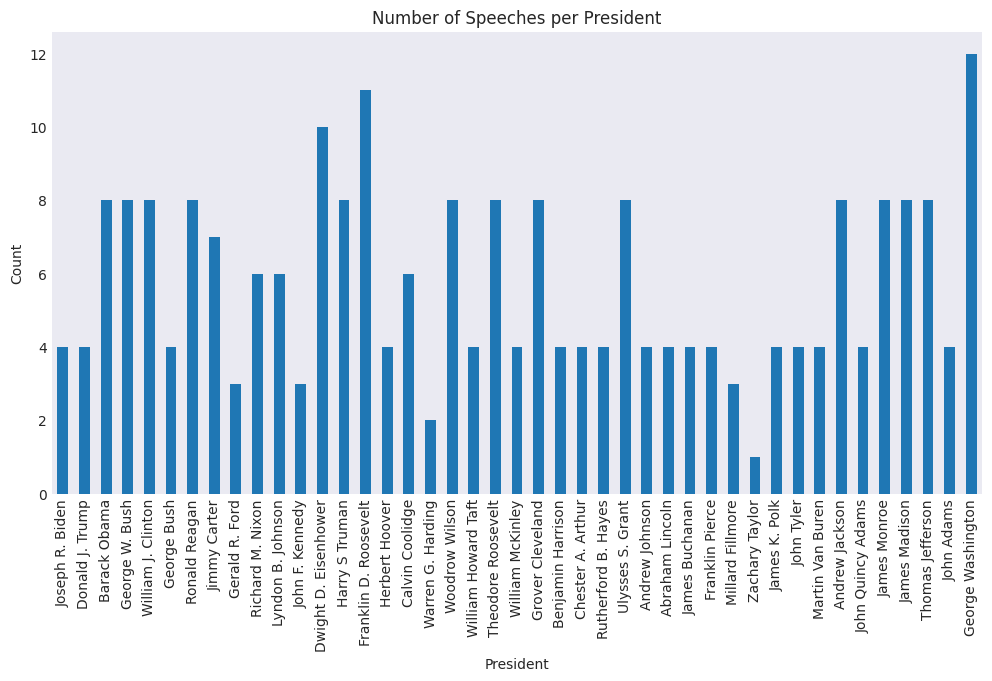

In [13]:
# set plot figure size
plt.figure(figsize=(12, 6))

# create a bar chart, with the data from num_speeches

# add plot title and labels, note that the xlabel automatically comes up as the "President"
num_speeches.plot(kind = "bar")
plt.title("Number of Speeches per President")
plt.ylabel("Count")

# save the chart to the outputs folder in this directory
plt.savefig("outputs/p01_number_of_speeches_by_president.png")

# I can showcase the figure below as well
plt.show()

#### Commentary

There doesn't seem to be too obvious of a pattern in the number of speeches per president based on the bar chart above. It seems that roughly on average 4-5 speeches where recorded for each president. Something interesting is that George Washington seems to have the most speeches per president. I wonder if this is because he served a long term or since he set precendent (pun-intended of course) of being the first president. I'm also curious how intact and accurate the speeches (in terms of text are) for the earlier presidents.

### Chart 2: Number of Speeches per Year

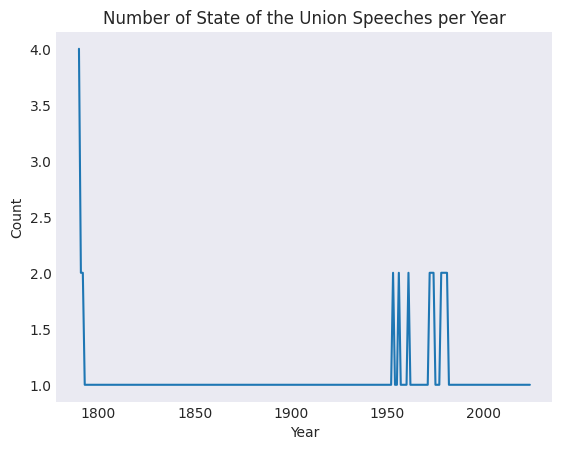

In [14]:
# showcase a line graph of the speech counts by year using .groupby() method to aggregate by group, and agg("count") to get the frequency
sou.groupby("Year")["Word Count"].agg("count").plot()
plt.title("Number of State of the Union Speeches per Year")
plt.ylabel("Count")

# save the figure in the outputs folder
plt.savefig("outputs/p01_number_sou_speeches_per_year.png")

# render the figure in this notebook
plt.show()

#### Commentary

The number of State of the Union speeches per year seems to mostly be around 1 for most of the recorded years in the dataset. We do see that there are multiple in the very beginning before 1800, which I'm curious as to why and how that relates to US independence. I'm also wondering why there are many spikes of 2 speeches between 1950 and 2000. Does this have to do with many human rights movements?

### Chart 3: Word Count Distribution 

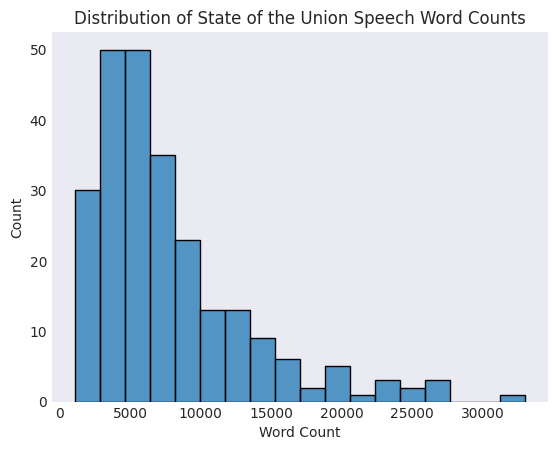

In [15]:
# create a word count distribution using the seaborn plotting method
sns.histplot(data = sou, x = "Word Count")
plt.title("Distribution of State of the Union Speech Word Counts")

# save the figure in the outputs folder
plt.savefig("outputs/p01_distribution_sou_word_counts.png")

# render the figure in this notebook
plt.show() 

#### Commentary

The distribution of SOU (State of Union) speech word counts seems to be centered roughly around 5000 words. Based on the histogram above, the relationship appears to be roughly unimodal and right tailed, with word counts ranging from about 0 to 30000+. An interesting speech seems to the the outlier which has above 30000 words. I'm curious about what this speech is, and whether excess fluff in the recording process lead to it being very high. 

### Chart 4: Word Count Distribution over Year

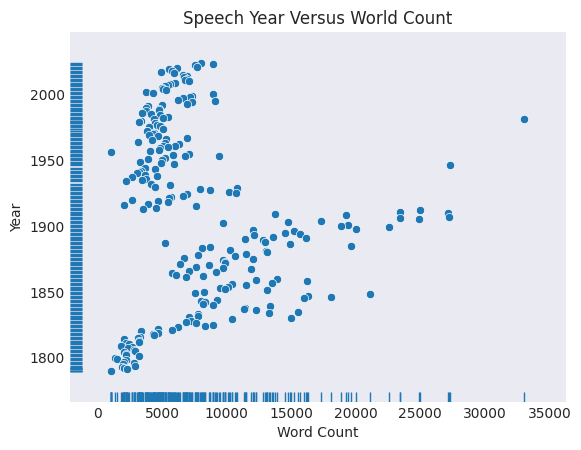

In [16]:
# create both a rugplot and overlaid scatterplot for the speech year over world count
sns.rugplot(data = sou, x = "Word Count", y = "Year")
sns.scatterplot(data = sou, x = "Word Count", y = "Year")
plt.title("Speech Year Versus World Count")

# save the figure in the outputs folder
plt.savefig("outputs/p01_speech_year_vs_word_count.png")

# render the figure in this notebook
plt.show()

#### Commentary

In the chart above, I've displayed the relationship between word count and year, and there doesn't seem to be too strong a linear relationship between the two variables. I do see a slight parabolic relationship, but I'm not sure whether that relationship is actually meaningful or just by chance. It seems that between about 1825 to 1925, there were many speeches that were very high outliers in terms of word counts.

### Chart 5: Word Count Distribution per President

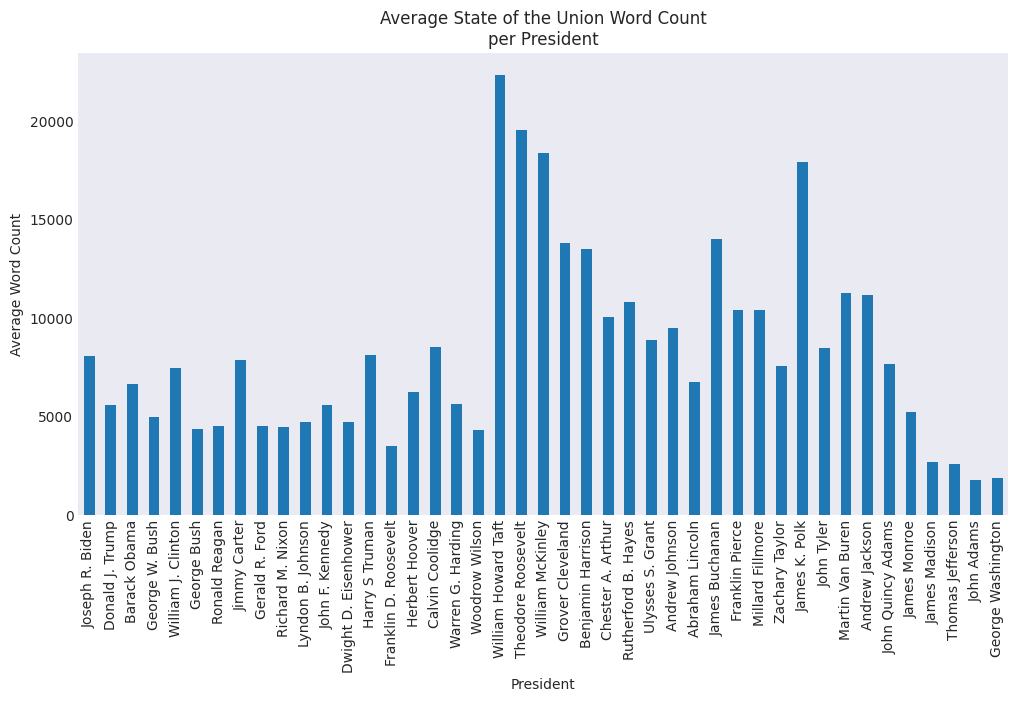

In [17]:
# set plot figure size
plt.figure(figsize=(12, 6))

# create a bar plot with the mean word counts per president
sou.groupby("President", sort = False)["Word Count"].agg("mean").plot(kind = "bar")
plt.title("Average State of the Union Word Count\nper President")
plt.ylabel("Average Word Count")

# save the figure in the outputs folder
plt.savefig("outputs/p01_word_count_distribution_per_president.png")

# render the figure in this notebook
plt.show()

#### Commentary

In the bar chart above, I've described the average word count for each president across their SOU speeches. It seems that William Taft had the highest average word count per speech, so I wonder whether that is because there was a lot of content/issues to address or if he was just a yapper (respectfully of course). Overall, it seems that most of the presidents have average word counts around 5000 words, so I wonder if that's a good enough time to keep the audience engaged while communiting their speech contents. 